 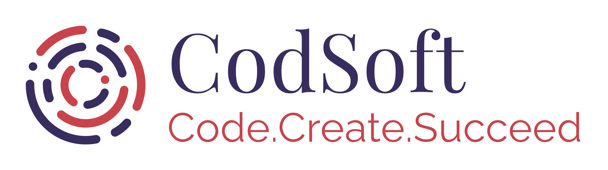

# **CodSoft - Data Science Internship**



## **`Author: Sai Charan Kanthuri Venkata`**
## **`Batch : SEPT BATCH A5`**
## **`Role: Data Science Intern`**
---



# **`Task 3 : IRIS Flower Classification`**



### **Classification**
 A ***Classification*** is a ***Supervised Machine learning*** model where, **it is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data.**

***We can identify the class of an iris flower based on obtained data using a `supervisied machine learning` model i.e.,`classification model`***

### Importing needed libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Preparing the Iris Data set

In [2]:
data=pd.read_csv('/content/IRIS.csv')

### Understanding the data and data preparation

**As we all know in any Machine learning Model `Data` plays a vital role, And it need to be accurate.So,I did a quick check on the data that i got, And modified them through Excel like adding `Column Names`,you can also do it through `pandas` library.**

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Description on Iris Dataset--

 #### Iris Dataset contains of 150 observations with 4 Features and 3 Labels
`1. Sepal Length`
`2. Sepal Width`
`3. Petal Length`
`4. Petal Width`
#### To Deterimine where a observation belong to



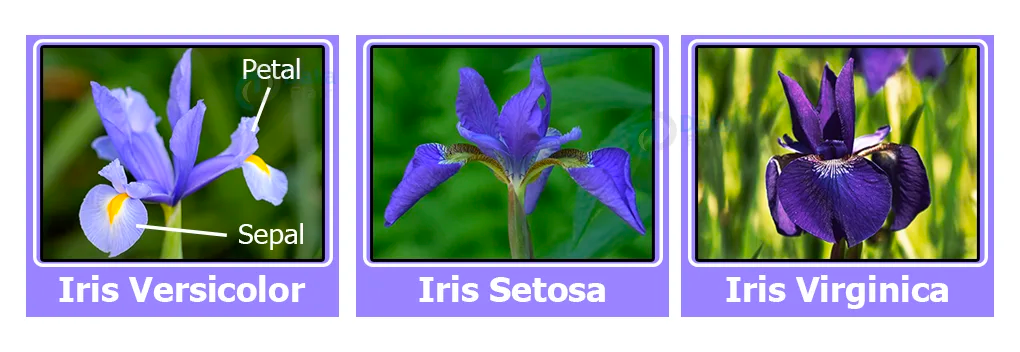

### Visualizing the data

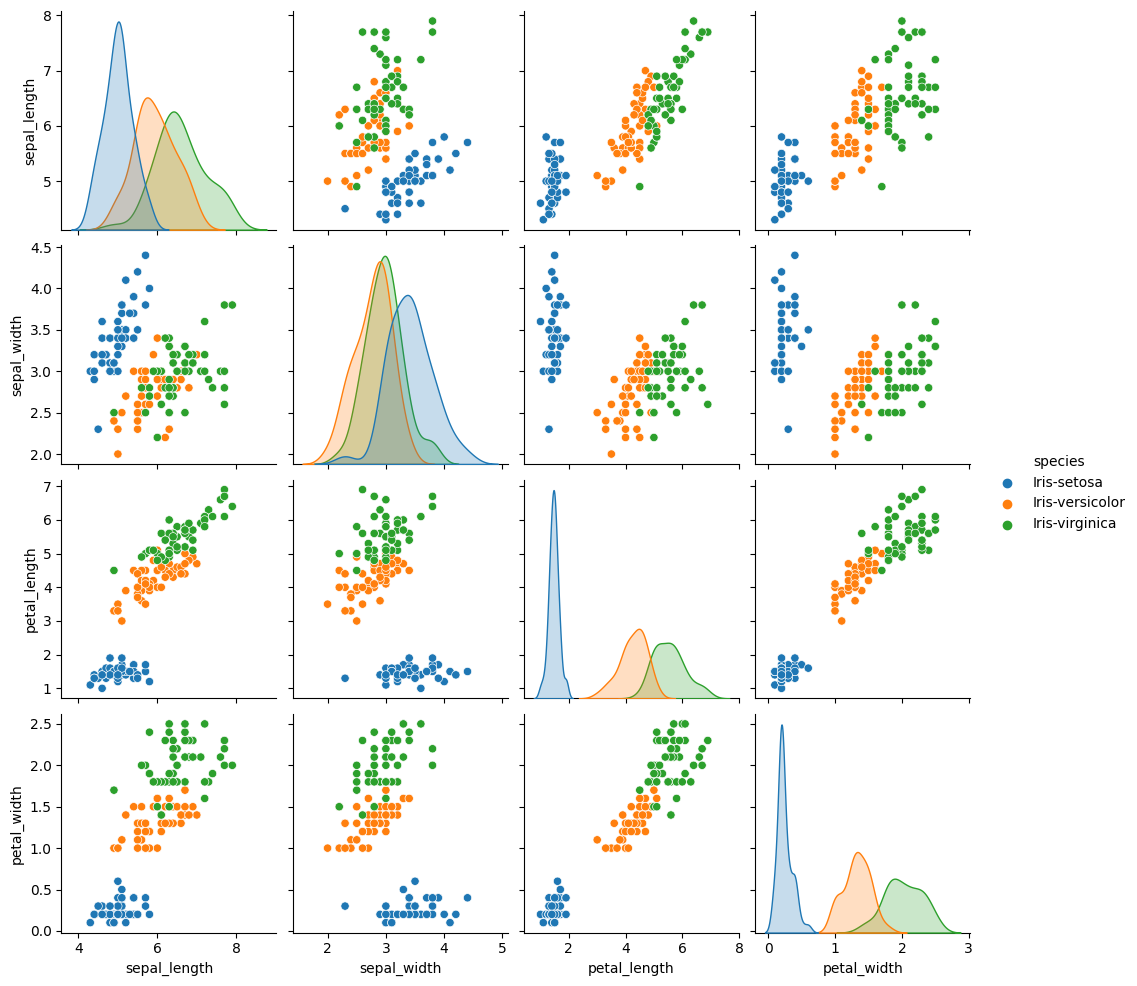

In [10]:
sns.pairplot(data=data,hue='species')
plt.show()

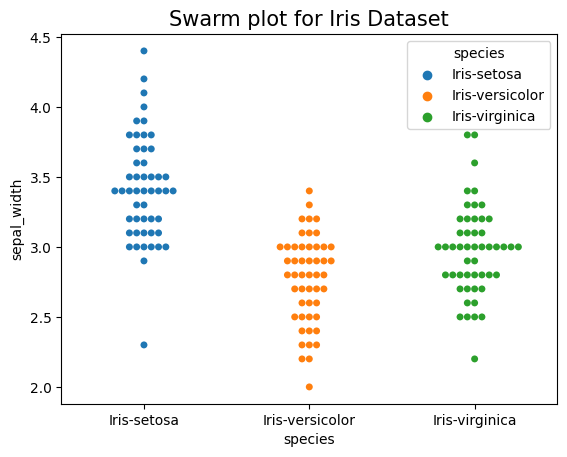

In [16]:
sns.swarmplot(x='species', y='sepal_width', data=data,hue='species')
plt.title('Swarm plot for Iris Dataset',size=15)
plt.show()

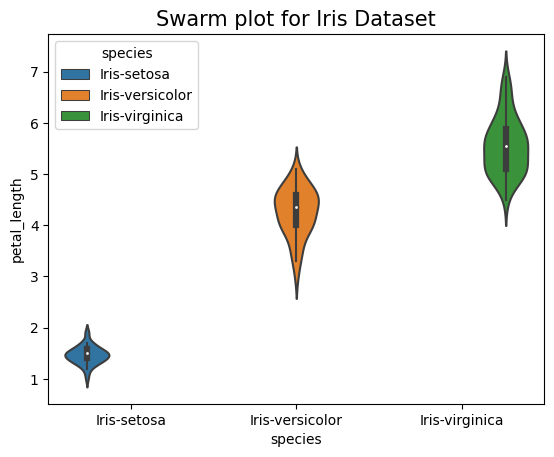

In [18]:
sns.violinplot(x='species', y='petal_length', data=data,hue='species')
plt.title('Swarm plot for Iris Dataset',size=15)
plt.show()

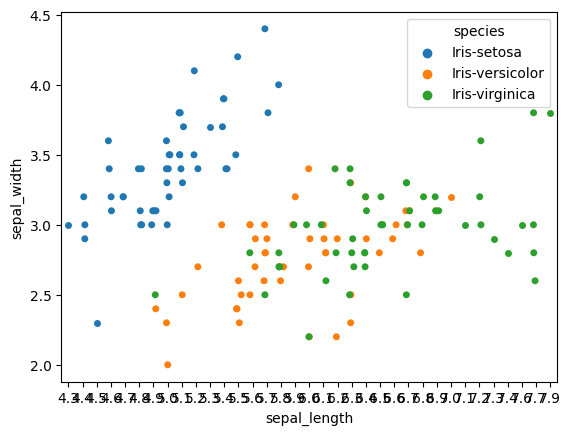

In [19]:
sns.stripplot(x='sepal_length',y='sepal_width',data= data,hue= 'species',jitter=0.2)
plt.show()

**After Understanding the data i got to know that, the target variable is in `SPECIES` column.and remaining all became `FEAUTRES`**

## Preparation of  Model

### Separating Target Variables and Feautres

In [21]:
Features= data.iloc[ : , 0:4]
target=data.loc[:,'species']

### Spliting data into Training data and testing data

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Features,target,test_size=0.2)

### Standarizing/Normalizing the Data set  and Training the Model

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
Standard_obj = StandardScaler() #standarizing model
Standard_obj.fit(X_train) #Training the Model
X_train_std = Standard_obj.transform(X_train)
X_test_std = Standard_obj.transform(X_test)

### Selecting suitable classifier techinque for model
#### We can use many methods for building a Model for this scenario we can use
#### **`KNearest-Neighbours`,`Decision Tree Classifier `,  `Random Forest Classifier` and many more but, Here i will be using `KNN` as it will be more accurate.**

In [24]:
#Applying Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
# Applying Support Vector Machine
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train_std, y_train)

SVC(gamma=0.5)

### Now we are done with our model Let's Evaluate it ,To know how accurate the model is...

### Evaluation of  Machine Learning Model

In [55]:
print("KNN ACCURACY :\n")
print('KNNTraining data accuracy {:.2f}'.format(knn.score(X_train_std, y_train)*100))
print('KNN Testing data accuracy {:.2f}'.format(knn.score(X_test_std, y_test)*100))
print("\nSVM ACCURACY :\n")
print('SVM Training data accuracy {:.2f}'.format(svm.score(X_train_std, y_train)*100))
print('SVM Testing data accuracy {:.2f}'.format(svm.score(X_test_std, y_test)*100))

KNN ACCURACY :

KNNTraining data accuracy 95.83
KNN Testing data accuracy 93.33

SVM ACCURACY :

SVM Training data accuracy 99.17
SVM Testing data accuracy 93.33


## **Conclusion :**
#### As we see the model accuracy is more than 93% for both models and compared SVM model training accuracy is higher.
#### so we can use it for any set of testing data to know what type of iris flower does the data belongs based on feautre values.

## ***THANK YOU***
## ***HAVE A NICE DAY 😄***